In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
wd = os.getcwd()
print("Current working directory: ", wd)
if wd[-9:] == "notebooks": wd = wd[:-10]
else: print("Make sure your working directory is set to the student-performance folder.")
os.chdir(wd)
print("New working directory: ", os.getcwd())
from utils.loader_steve import load_level_group_X_y, load_all_X_y

Current working directory:  /home/joh/student-performance/notebooks
New working directory:  /home/joh/student-performance


NameError: name 'np' is not defined

In [19]:
# X
df = pd.read_csv("data/processed/df_5_12_flattened.csv", index_col=0)
X = df.iloc[:, :].values
# X = np.delete(X, 61, 1)

# y
labels = pd.read_csv("data/processed/labels_q4-13.csv")
y = labels['correct'].values

In [13]:
model = LogisticRegression(solver='liblinear', random_state=0, max_iter = 100)

In [14]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
model.fit(X, y)

NameError: name 'model' is not defined

In [38]:
model.classes_

array([0, 1])

In [39]:
model.intercept_

array([0.00013076])

In [40]:
model.coef_

array([[ 4.22764741e-04, -1.13232754e-04, -5.79929763e-04,
         1.86855765e-05,  1.46332318e-04,  5.85199331e-05,
         1.78131057e-04,  2.06530064e-05,  2.13643978e-05,
         7.45509928e-04,  1.52646494e-03, -8.91463172e-04,
         2.70222636e-04, -1.80504264e-04,  4.54811739e-05,
        -1.45689881e-04, -8.45819351e-04, -1.39581424e-04,
         1.50435939e-04,  8.08578338e-03, -8.20532751e-03,
         2.05596432e-05,  4.80033564e-04, -7.95963481e-05,
        -1.18649218e-04, -2.63549032e-04,  4.18795842e-04,
        -9.25612795e-04, -1.09388695e-05,  8.01053456e-04,
         8.02793548e-04,  2.56167712e-04,  3.69987273e-05,
        -3.01199448e-04, -1.28369858e-04,  1.29152576e-04,
        -1.37331674e-03,  2.36541601e-03, -4.63894205e-04,
        -5.18853991e-06, -2.96484121e-05, -1.48680647e-05,
         3.30340962e-04,  1.49219356e-03,  9.89786583e-05,
         6.89873597e-04,  1.74549964e-04, -6.47666129e-04,
         5.34379228e-06,  1.07956487e-03,  2.13408715e-0

In [41]:
model.predict_proba(X)

array([[0.47656041, 0.52343959],
       [0.68609081, 0.31390919],
       [0.46570642, 0.53429358],
       ...,
       [0.46497393, 0.53502607],
       [0.49210275, 0.50789725],
       [0.69481013, 0.30518987]])

In [42]:
model.predict(X)

array([1, 0, 1, ..., 1, 1, 0])

In [43]:
model.score(X, y)

0.6103896103896104

In [44]:
confusion_matrix(y, model.predict(X))

array([[5936, 5717],
       [3463, 8446]])

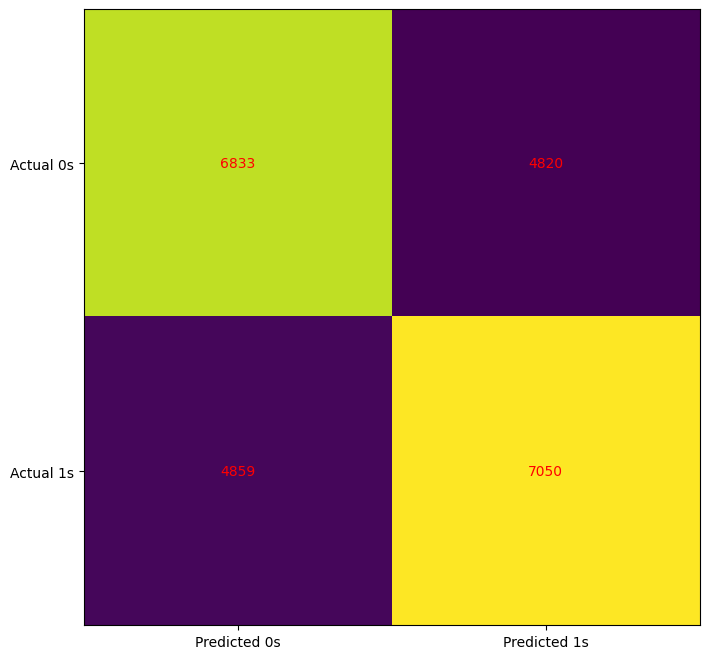

In [20]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [45]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56     11653
           1       0.60      0.71      0.65     11909

    accuracy                           0.61     23562
   macro avg       0.61      0.61      0.61     23562
weighted avg       0.61      0.61      0.61     23562

